## Getting Scripts From GitHub
-Since we require free GPUs, we will bring the code into Google Colaboratory

In [1]:
!git clone https://github.com/leeyeehoo/CSRNet-pytorch.git

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 86, done.
remote: Total 86 (delta 0), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (86/86), 622.23 KiB | 3.84 MiB/s, done.


## Installing Essential Libraries and Frameworks

In [23]:
!pip install cuda-python
!pip install pytorch
!pip install pillow

!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604–9–2-local_9.2.88–1_amd64.deb
!apt-key add /var/cuda-repo-9–2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
import torch
from tqdm import tqdm
%matplotlib inline

import torch.nn as nn
import torch
from torchvision import models
from torchvision import datasets, transforms
from matplotlib import cm as c
from google.colab import drive
import os
import os.path
import csv
from datetime import date
import cv2 as cv
import os
from time import time
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-05-12 14:51:16--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (dev

<ipython-input-23-c358e772400d>:19: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## Mounting Drive - Downloading Train-Test Data

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Defining Paths for Train-Test Data

In [4]:
part_A_train = os.path.join('/content/drive/MyDrive/Christ_Pics_Train/train_data','images')
part_A_test = os.path.join('/content/drive/MyDrive/Christ_Pics_Train/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

## Generate Gausssian Density Plots for Images

In [6]:
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [7]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_400.jpg
(440, 845)
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_401.jpg
(404, 647)
generate density...


<ipython-input-6-719fb4a948b1>:23: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_402.jpg
(466, 700)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_403.jpg
(590, 886)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_404.jpg
(433, 660)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_405.jpg
(253, 450)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_406.jpg
(720, 1280)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_407.jpg
(900, 1200)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/train_data/images/IMG_408.jpg
(250, 540)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/test_data/images/IMG_400.jpg
(344, 830)
generate density...
done.
/content/drive/MyDrive/Christ_Pics_Train/test_data/images/IMG_401.jpg
(724, 1024)
generate density...
done.
/content/drive/MyDriv

## Looking at a Sample

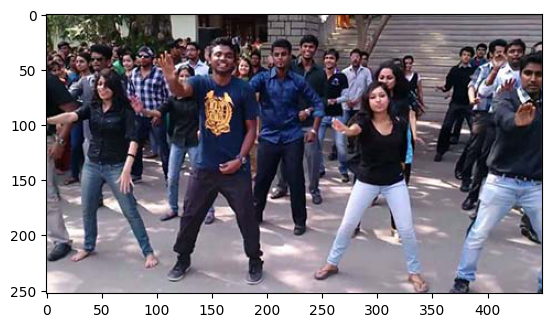

In [8]:
plt.imshow(Image.open(img_paths[5]))

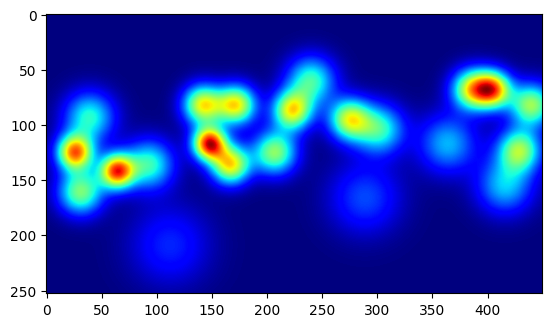

In [9]:
gt_file = h5py.File(img_paths[5].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [10]:
np.sum(groundtruth)

21.593483

## Train Model using Image Paths stored in JSON file

In [11]:
!python CSRNet-pytorch/train.py CSRNet-pytorch/part_A_train.json CSRNet-pytorch/part_A_val.json 0 0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:02<00:00, 238MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
epoch 0, process

In [12]:
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [13]:
part_A_test = os.path.join('/content/drive/MyDrive/Christ_Pics_Train/test_data','images')
path_sets = [part_A_test]

In [14]:
class CSRNet(nn.Module):
    def __init__(self, load_weights=False):
        super(CSRNet, self).__init__()
        self.seen = 0
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat  = [512, 512, 512,256,128,64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
        if not load_weights:
            mod = models.vgg16(pretrained = True)
            self._initialize_weights()
            for i in range(len(self.frontend.state_dict().items())):
                list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
    def forward(self,x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, std=0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            
                
def make_layers(cfg, in_channels = 3,batch_norm=False,dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate,dilation = d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers) 

In [15]:
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)
 

model = CSRNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
#defining the model
model = model.cuda()
#loading the trained weights
checkpoint = torch.load('0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

Predicted Count :  14


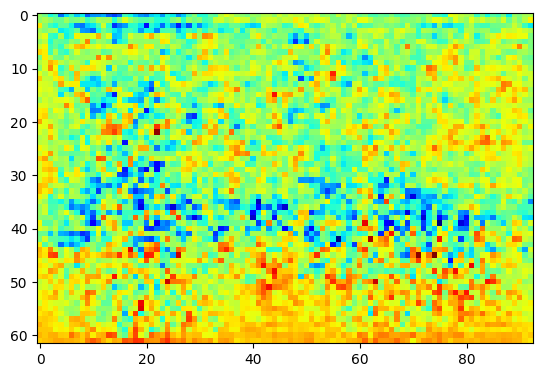

Original Count :  7


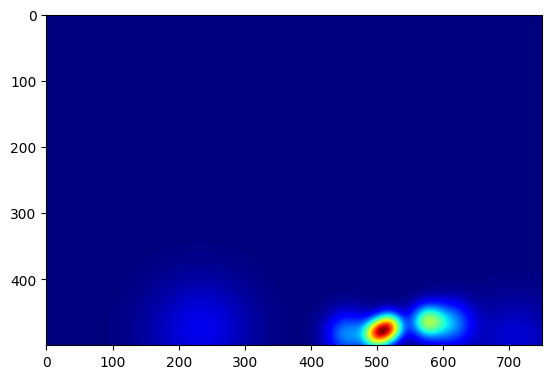

Original Image


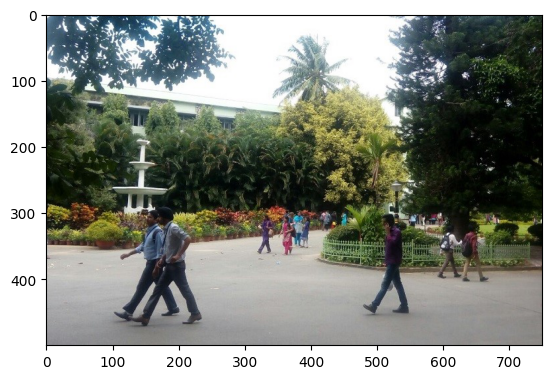

In [27]:
img = transform(Image.open('/content/drive/MyDrive/Christ_Pics_Train/test_data/images/IMG_402.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/content/drive/MyDrive/Christ_Pics_Train/test_data/ground_truth/IMG_402.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/drive/MyDrive/Christ_Pics_Train/test_data/images/IMG_402.jpg'))
plt.show()

## Generating Counts using Trained Model

In [ ]:
## If capturing data from live video stream
import cv2   #include opencv library functions in python

#Create an object to hold reference to camera video capturing
vidcap = cv2.VideoCapture(0)

#check if connection with camera is successfully
if vidcap.isOpened():
    ret, frame = vidcap.read()  #capture a frame from live video

    #check whether frame is successfully captured
    if ret:
        # continue to display window until 'q' is pressed
        while(True):
            cv2.imshow("Frame",frame)   #show captured frame
            
            #press 'q' to break out of the loop
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    #print error if frame capturing was unsuccessful
    else:
        print("Error : Failed to capture frame")

# print error if the connection with camera is unsuccessful
else:
    print("Cannot open camera")

Cannot open camera


In [19]:
!mkdir Count_Reports

In [35]:
## If capturing data from video clips

def run_count(captured_img_path,img_timestamp):
  model = CSRNet()
  #defining the model
  model = model.cuda()
  #loading the trained weights
  checkpoint = torch.load('/content/drive/MyDrive/Christ_Pics_Train/0model_best.pth.tar')
  model.load_state_dict(checkpoint['state_dict'])
  img = transform(Image.open(captured_img_path).convert('RGB')).cuda()
  output = model(img.unsqueeze(0))
  predicted_cnt = int(output.detach().cpu().sum().numpy())
  return (img_timestamp,captured_img_path,"front_gate",predicted_cnt)

def write_counts(img_details):
    if os.path.isfile(os.getcwd()+f'/Count_Reports/Count_Report_{date.today().strftime("%Y%m%d")}.csv'):
        with open(os.getcwd()+f'/Count_Reports/Count_Report_{date.today().strftime("%Y%m%d")}.csv', 'a') as file:
            writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
            writer.writerow([f"{img_details[0]}", f"{img_details[1]}", f"{img_details[2]}",f"{img_details[3]}"])
    else:
        cr_path = os.getcwd()+f'/Count_Reports/'
        isExist = os.path.exists(os.getcwd()+f'/Count_Reports/')
        if not isExist:
            os.makedirs(cr_path)
        with open(os.getcwd()+f'/Count_Reports/Count_Report_{date.today().strftime("%Y%m%d")}.csv', 'w') as file:
            writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
            field = ["capture_timestamp", "image_path", "location","count"]
        
            writer.writerow(field)
            writer.writerow([f"{img_details[0]}", f"{img_details[1]}", f"{img_details[2]}",f"{img_details[3]}"])

file = "/content/drive/MyDrive/Christ_Pics_Train/video_stream.mp4"

if not os.path.isfile(file):
    print("File not found!")

# images forder name
folder_name = base=os.path.basename(file) + " frames"

# create folder for images in current path if not exists
current_path = os.getcwd()
folder_path = os.path.join(current_path, folder_name)

if not os.path.exists(folder_path):
    os.mkdir(folder_path)

cap = cv.VideoCapture(file)

total_frame = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# save frame every # seconds
seconds = 40
fps = cap.get(cv.CAP_PROP_FPS) # Gets the frames per second
# calculates number of frames that creates 10 seconds of video
multiplier = fps * seconds

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video stream or file")

frame_counter = 1

while frame_counter <= total_frame:

    cap.set(cv.CAP_PROP_POS_FRAMES, frame_counter)

    ret, frame = cap.read()

    # save frame
    # file path
    file_path = os.path.join(folder_path, str(time()) + ".jpg")
    cv.imwrite(file_path, frame)
    #count to sheet script
    img_details = run_count(file_path,datetime.datetime.now())
    write_counts(img_details)
    frame_counter += multiplier

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
!cp 0model_best.pth.tar '/content/drive/MyDrive/Christ_Pics_Train/'

In [34]:
! rmdir -p  "video_stream.mp4 frames"

rmdir: failed to remove 'video_stream.mp4 frames': Directory not empty
